<a href="https://colab.research.google.com/github/rafa408/Projeto_Bootcamp_CDIA/blob/main/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Escolha do Modelo**

 O código analisa a quantidade e o tipo dos valores na coluna alvo para categorizar o problema de classificação como binário, multiclasse ou multirrótulo.

In [ ]:
import pandas as pd
import numpy as np

def analisar_tipo_classificacao(df, coluna_alvo):
    """
    Analisa o tipo de problema de classificação (binário, multiclasse ou multirrótulo)
    com base na coluna alvo de um DataFrame.

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        coluna_alvo (str): O nome da coluna que contém os rótulos/classes.

    Returns:
        str: Uma string que descreve o tipo de problema de classificação.
             Retorna "Erro: Coluna alvo não encontrada" se a coluna_alvo não existir.
    """
    if coluna_alvo not in df.columns:
        return "Erro: Coluna alvo não encontrada"

    # Obter valores únicos na coluna alvo
    valores_unicos = df[coluna_alvo].unique()
    num_valores_unicos = len(valores_unicos)

    # Verificar se há valores não-booleanos para classificação binária
    valores_nao_booleanos = [v for v in valores_unicos if not isinstance(v, bool)]

    # Determinar o tipo de classificação
    if num_valores_unicos == 2 and not valores_nao_booleanos:
        tipo_classificacao = "Binária (apenas dois valores booleanos)"
    elif num_valores_unicos == 2:
        tipo_classificacao = "Binária (dois valores únicos)"
    elif num_valores_unicos > 2:
        # Verificar se é multirrótulo
        for valor in valores_unicos:
            if isinstance(valor, list):
                tipo_classificacao = "Multirrótulo"
                return tipo_classificacao
        tipo_classificacao = "Multiclasse"
    else:
        tipo_classificacao = "Não há rótulos suficientes para classificação"

    return tipo_classificacao

def exemplo_uso():
    """
    Exemplos de uso da função analisar_tipo_classificacao com diferentes DataFrames.
    """
    # Exemplo 1: DataFrame com classificação binária booleana
    data_binario_bool = {'alvo': [True, False, True, True, False]}
    df_binario_bool = pd.DataFrame(data_binario_bool)
    tipo_binario_bool = analisar_tipo_classificacao(df_binario_bool, 'alvo')
    print(f"Exemplo 1 (Binário Booleano): {tipo_binario_bool}")

    # Exemplo 2: DataFrame com classificação binária numérica
    data_binario_numerico = {'alvo': [0, 1, 0, 1, 0]}
    df_binario_numerico = pd.DataFrame(data_binario_numerico)
    tipo_binario_numerico = analisar_tipo_classificacao(df_binario_numerico, 'alvo')
    print(f"Exemplo 2 (Binário Numérico): {tipo_binario_numerico}")

    # Exemplo 3: DataFrame com classificação multiclasse
    data_multiclasse = {'classe': ['A', 'B', 'C', 'A', 'B']}
    df_multiclasse = pd.DataFrame(data_multiclasse)
    tipo_multiclasse = analisar_tipo_classificacao(df_multiclasse, 'classe')
    print(f"Exemplo 3 (Multiclasse): {tipo_multiclasse}")

    # Exemplo 4: DataFrame com classificação multirrótulo
    data_multirotulo = {'tags': [['a', 'b'], ['b', 'c'], ['a'], ['a', 'c'], ['b']]}
    df_multirotulo = pd.DataFrame(data_multirotulo)
    tipo_multirotulo = analisar_tipo_classificacao(df_multirotulo, 'tags')
    print(f"Exemplo 4 (Multirrótulo): {tipo_multirotulo}")

    # Exemplo 5: DataFrame com coluna alvo inexistente
    data_erro = {'valor': [1, 2, 3, 4, 5]}
    df_erro = pd.DataFrame(data_erro)
    tipo_erro = analisar_tipo_classificacao(df_erro, 'alvo')
    print(f"Exemplo 5 (Erro): {tipo_erro}")

# Executar os exemplos
exemplo_uso()

# Carregar seu dataset
try:
    seu_df = pd.read_csv('bootcamp_train.csv')  # Substitua pelo caminho do seu arquivo
    tipo_seu_dataset = analisar_tipo_classificacao(seu_df, 'class') # Substitua 'class' pelo nome da sua coluna alvo
    print(f"\nO tipo de classificação do seu dataset é: {tipo_seu_dataset}")
except FileNotFoundError:
    print("Erro: Arquivo 'bootcamp_train.csv' não encontrado. Por favor, verifique o caminho do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao processar o arquivo: {e}")


Exemplo 1 (Binário Booleano): Binária (dois valores únicos)
Exemplo 2 (Binário Numérico): Binária (dois valores únicos)
Exemplo 3 (Multiclasse): Multiclasse


TypeError: unhashable type: 'list'

# **Multiclasse**

Código de Classificação Multiclasse

1. Importação das Bibliotecas:

O código começa importando as bibliotecas necessárias:

* pandas (pd): Usada para manipulação e análise de dados tabulares.

* sklearn.model_selection.train_test_split: Usada para dividir os dados em conjuntos de treinamento e teste.

* sklearn.ensemble.RandomForestClassifier: Usada para criar o modelo de Random Forest para classificação multiclasse.

* sklearn.metrics.classification_report: Usada para gerar um relatório detalhado do desempenho do modelo, incluindo precisão, recall e F1-score.

* sklearn.metrics.accuracy_score: Usada para calcular a acurácia do modelo.

* sklearn.metrics.confusion_matrix: Usada para gerar a matriz de confusão


2. Definição da Função classificar_multiclasse:

A função classificar_multiclasse encapsula a lógica para realizar a classificação multiclasse:

* Parâmetros: df (pd.DataFrame): O DataFrame que contém os dados a serem classificados.

* coluna_alvo (str): O nome da coluna que contém os rótulos de classe.

* colunas_features (list): Uma lista dos nomes das colunas que serão usadas como features (variáveis independentes) para a classificação.

Verificação da Existência de Colunas:

O código verifica se a coluna_alvo e todas as colunas em colunas_features existem no DataFrame de entrada. Se alguma coluna não for encontrada, a função imprime uma mensagem de erro e retorna, interrompendo o processo.

Preparação dos Dados:

* X = df[colunas_features]: Cria um novo DataFrame X contendo apenas as colunas de features selecionadas. Este será o conjunto de dados de entrada para o modelo.

* y = df[coluna_alvo]: Cria uma Series y contendo os valores da coluna alvo, que representam as classes verdadeiras para cada amostra. Este é o conjunto de dados de saída que o modelo aprenderá a prever.

Divisão dos Dados em Treinamento e Teste:

* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42):

* Divide os dados em conjuntos de treinamento (X_train, y_train) e teste (X_test, y_test).

* test_size=0.2 especifica que 20% dos dados serão usados para teste, enquanto 80% serão usados para treinamento.

* random_state=42 garante que a divisão dos dados seja a mesma cada vez que o código for executado, o que é importante para a reprodutibilidade dos resultados.

Criação e Treinamento do Modelo:

* modelo_random_forest = RandomForestClassifier(n_estimators=100, random_state=42):Cria uma instância do modelo Random Forest Classifier.

* n_estimators=100 define o número de árvores de decisão na floresta para 100. Este é um parâmetro importante que controla a complexidade e o desempenho do modelo.

* random_state=42 garante a reprodutibilidade

* modelo_random_forest.fit(X_train, y_train): Treina o modelo Random Forest usando os dados de treinamento. O modelo aprende a relação entre as features em X_train e as classes em y_train.

Previsão com o Modelo:

y_pred = modelo_random_forest.predict(X_test): Usa o modelo treinado para fazer previsões sobre as classes das amostras no conjunto de teste X_test. As previsões são armazenadas em y_pred.

Avaliação do Desempenho do Modelo:

O código imprime três métricas importantes para avaliar o desempenho do modelo:

* classification_report(y_test, y_pred): Gera um relatório detalhado que inclui:
Precisão (precision): A proporção de amostras classificadas como positivas que realmente são positivas.

* Recall (sensibilidade): A proporção de amostras positivas que foram corretamente classificadas como positivas.

* F1-score: A média harmônica de precisão e recall.

* Suporte (support): O número de amostras em cada classe.

* accuracy_score(y_test, y_pred): Calcula a acurácia geral do modelo, que é a proporção de amostras classificadas corretamente em todas as classes.

* confusion_matrix(y_test, y_pred): Exibe a matriz de confusão, que mostra a contagem de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos, permitindo uma análise mais detalhada do desempenho do modelo por classe.

3. Bloco if __name__ == "__main__"::

Este bloco de código é executado quando o script Python é executado diretamente (não quando é importado como um módulo):

Carregamento do Dataset:

O código tenta carregar um dataset de um arquivo CSV chamado 'bootcamp_train.csv' usando pd.read_csv().

Se o arquivo não for encontrado, o código imprime uma mensagem de erro e encerra a execução.

É importante substituir  'bootcamp_train.csv' pelo caminho correto do seu arquivo.

Definição da Coluna Alvo e Colunas de Features:

* O código define as variáveis coluna_alvo e colunas_features.

* coluna_alvo é definida como 'class', que se espera ser a coluna que contém as classes de defeito no seu dataset. Você deve substituir 'class' pelo nome da coluna apropriada no seu caso.

* colunas_features é inicializada com uma lista de nomes de colunas que descrevem os defeitos. Você deve substituir esta lista pelos nomes das colunas relevantes do seu dataset.

* Chamada da Função classificar_multiclasse: Finalmente, o código chama a função classificar_multiclasse com o DataFrame carregado e as colunas alvo e de features definidas para realizar a classificação multiclasse.

Em resumo, o código carrega um dataset, prepara os dados, treina um modelo Random Forest e avalia seu desempenho na classificação das amostras em diferentes classes. Os resultados da avaliação são impressos no console.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:47:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report:
              precision    recall  f1-score   support

     falha_1       0.43      0.30      0.36        43
     falha_2       0.97      0.78      0.86        36
     falha_3       0.91      0.99      0.95        73
     falha_4       0.83      0.95      0.88        20
     falha_5       0.71      0.59      0.65        17
     falha_6       0.58      0.53      0.55       134
falha_outros       0.58      0.66      0.62       182

    accuracy                           0.66       505
   macro avg       0.72      0.69      0.70       505
weighted avg       0.66      0.66      0.66       505



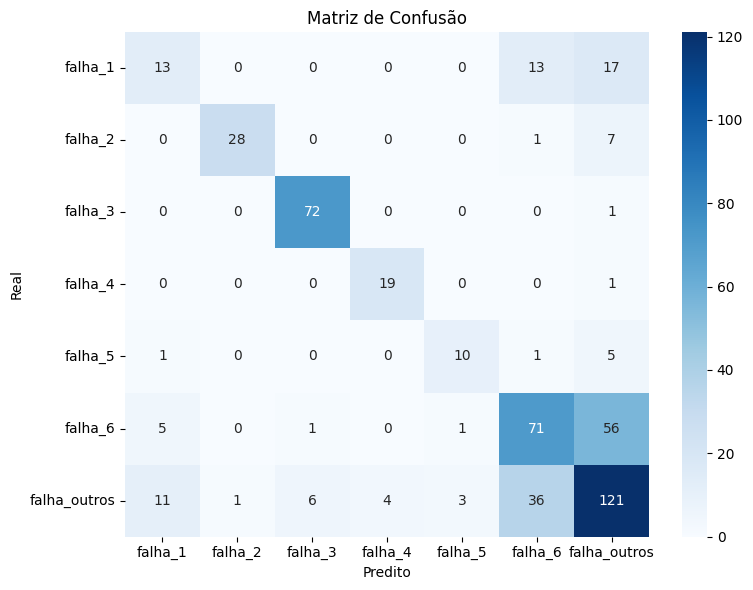

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset
df = pd.read_csv("bootcamp_train_tratado.csv")


# 2. Combinar colunas de falha em uma única variável categórica
falha_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
df['tipo_de_falha'] = df[falha_cols].idxmax(axis=1)

# (Opcional) Remover as colunas originais de falha
df.drop(columns=falha_cols, inplace=True)

# 3. Separar features e target
X = df.drop(columns=['tipo_de_falha'])
y = df['tipo_de_falha']

# ⚠️ 4. Codificar colunas categóricas (ex: tipo_de_aço)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5. Codificar a variável target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# 7. Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Treinar o modelo
model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 9. Avaliar o modelo
y_pred = model.predict(X_test_scaled)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 10. Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()



# **Resultados**

Análise dos Resultados da Classificação Multiclasse
Aqui está uma análise dos resultados da classificação multiclasse que você apresentou:

Métricas Gerais:

Acurácia (Accuracy): 66% - Esta é a porcentagem geral de amostras que o modelo classificou corretamente. Em geral, não é um ótimo resultado.

Média Macro:

Precisão (Precision): 72%

Recall: 69%

F1-Score: 70%

Média Ponderada:

Precisão (Precision): 66%

Recall: 66%

F1-Score: 66%

Análise por Classe:

falha_1:

Precisão: 43% - Das amostras previstas como falha_1, apenas 43% estavam corretas.

Recall: 30% - Das amostras reais de falha_1, o modelo identificou corretamente apenas 30%.

F1-Score: 36% - Desempenho ruim tanto em precisão quanto em recall.

falha_2:

Precisão: 97% - Quase todas as amostras previstas como falha_2 estavam corretas.

Recall: 78% - O modelo identificou corretamente 78% das amostras reais de falha_2.

F1-Score: 86% - Bom desempenho geral.

falha_3:

Precisão: 91% - A maioria das amostras previstas como falha_3 estavam corretas.

Recall: 99% - O modelo identificou corretamente quase todas as amostras reais de falha_3.

F1-Score: 95% - Excelente desempenho.

falha_4:

Precisão: 83%

Recall: 95%

F1-Score: 88% - Bom desempenho.

falha_5:

Precisão: 71%

Recall: 59%

F1-Score: 65% - Desempenho moderado.

falha_6:

Precisão: 58%

Recall: 53%

F1-Score: 55% - Desempenho abaixo do ideal.

falha_outros:

Precisão: 58%

Recall: 66%

F1-Score: 62% - Desempenho abaixo do ideal.

# **Melhorias**

Coleta de Mais Dados: Coletar mais dados para as classes com baixo desempenho (falha_1, falha_6 e falha_outros) pode melhorar significativamente o desempenho do modelo.

Engenharia de Features: Criar novas features que sejam mais discriminativas para as diferentes classes de falha pode ajudar o modelo a aprender melhor.

Seleção de Modelo: Experimentar com diferentes algoritmos de classificação (por exemplo, Gradient Boosting, Redes Neurais) pode levar a um melhor desempenho.

Ajuste de Hiperparâmetros: Ajustar os hiperparâmetros do modelo Random Forest pode melhorar o desempenho.

Balanceamento de Classes: Se o conjunto de dados estiver desbalanceado, técnicas de balanceamento de classes (oversampling, undersampling) podem ser úteis.


--- XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:08:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report:
              precision    recall  f1-score   support

     falha_1       0.50      0.29      0.37        55
     falha_2       0.94      0.85      0.89        53
     falha_3       0.98      0.95      0.96       130
     falha_4       0.83      0.87      0.85        23
     falha_5       0.65      0.68      0.67        19
     falha_6       0.58      0.55      0.56       161
falha_outros       0.62      0.72      0.67       237

    accuracy                           0.70       678
   macro avg       0.73      0.70      0.71       678
weighted avg       0.70      0.70      0.70       678

Acurácia: 0.7035398230088495


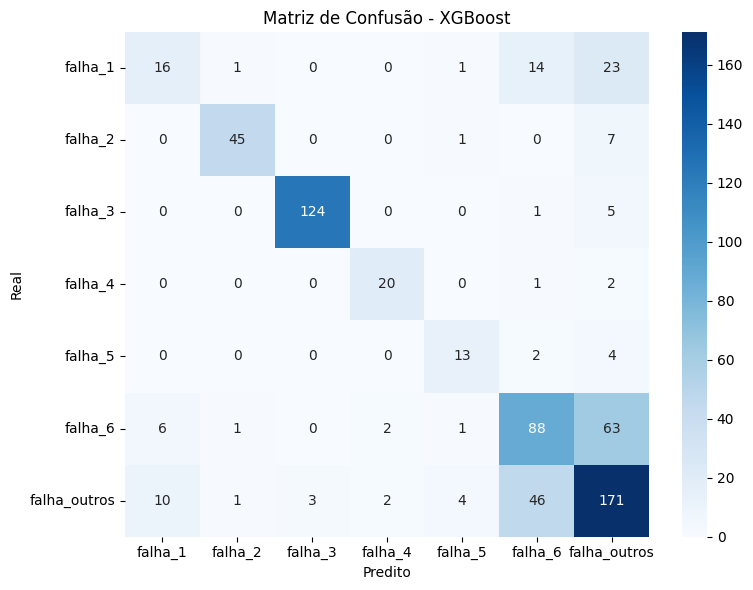


--- Random Forest ---
📊 Classification Report:
              precision    recall  f1-score   support

     falha_1       0.55      0.29      0.38        55
     falha_2       0.88      0.81      0.84        53
     falha_3       0.95      0.95      0.95       130
     falha_4       0.77      0.87      0.82        23
     falha_5       0.79      0.58      0.67        19
     falha_6       0.62      0.51      0.56       161
falha_outros       0.59      0.75      0.66       237

    accuracy                           0.70       678
   macro avg       0.74      0.68      0.70       678
weighted avg       0.70      0.70      0.69       678

Acurácia: 0.696165191740413


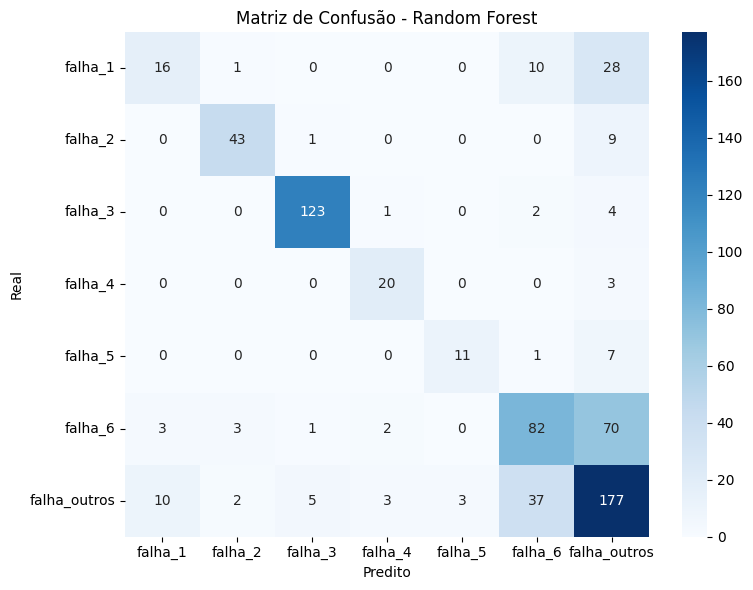


--- Logistic Regression ---
📊 Classification Report:
              precision    recall  f1-score   support

     falha_1       0.59      0.24      0.34        55
     falha_2       0.87      0.87      0.87        53
     falha_3       0.93      0.98      0.95       130
     falha_4       0.80      0.87      0.83        23
     falha_5       0.60      0.47      0.53        19
     falha_6       0.58      0.55      0.56       161
falha_outros       0.61      0.70      0.65       237

    accuracy                           0.69       678
   macro avg       0.71      0.67      0.68       678
weighted avg       0.69      0.69      0.68       678

Acurácia: 0.6932153392330384


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


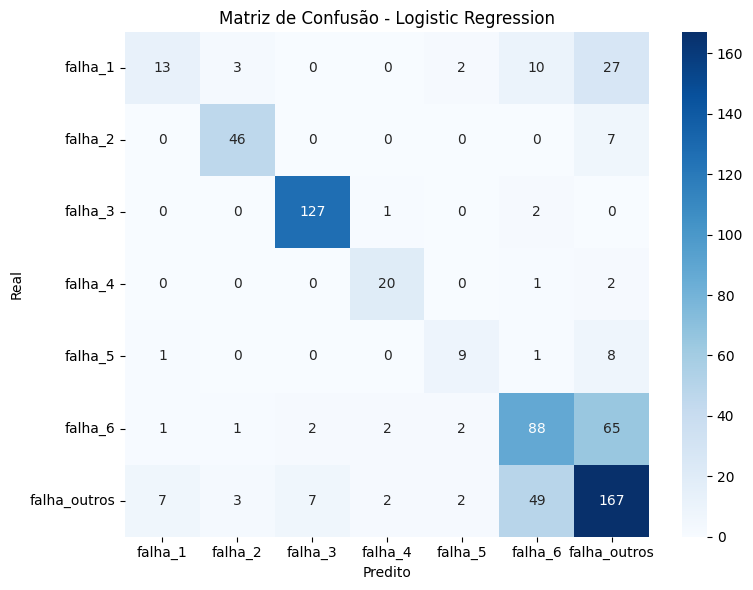

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Carregar o dataset
csv_file_path = "bootcamp_train_limpo.csv"  # Store the file path in a variable
if os.path.exists(csv_file_path): # Check if the file exists
    df = pd.read_csv(csv_file_path)
else:
    print(f"Error: File not found at {csv_file_path}. Please check the file path and try again.")
    exit()

# 2. Combinar colunas de falha em uma única variável categórica
falha_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
df['tipo_de_falha'] = df[falha_cols].idxmax(axis=1)

# (Opcional) Remover as colunas originais de falha
df.drop(columns=falha_cols, inplace=True)

# 3. Separar features e target
X = df.drop(columns=['tipo_de_falha'])
y = df['tipo_de_falha']

# 4. Codificar colunas categóricas (ex: tipo_de_aço)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5. Codificar a variável target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# 7. Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Treinar e avaliar modelos
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test, le):
    """
    Treina e avalia um modelo de classificação, imprimindo o relatório de classificação
    e a matriz de confusão.

    Args:
        model: O modelo de classificação a ser treinado.
        model_name (str): Nome do modelo para exibição nos resultados.
        X_train: Dados de treinamento normalizados.
        y_train: Rótulos de treinamento codificados.
        X_test: Dados de teste normalizados.
        y_test: Rótulos de teste codificados.
        le: LabelEncoder usado para decodificar os rótulos.

    Returns:
        None
    """
    print(f"\n--- {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    print("Acurácia:", accuracy_score(y_test, y_pred)) # Adicionado para imprimir a acurácia

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.tight_layout()
    plt.show()

# 9. Inicializar e treinar modelos
xgb_model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(multi_class='ovr', random_state=42, max_iter=1000) # Alterado para one-vs-rest

train_and_evaluate(xgb_model, "XGBoost", X_train_scaled, y_train, X_test_scaled, y_test, le)
train_and_evaluate(rf_model, "Random Forest", X_train_scaled, y_train, X_test_scaled, y_test, le)
train_and_evaluate(lr_model, "Logistic Regression", X_train_scaled, y_train, X_test_scaled, y_test, le)
